---

# <center><b>LetsGrowMore- Data Science Intern</b></center>  
<font size=4><center>Author: Soundarya G</center></font>

---

## <center>TASK 1: Iris Flower Classification ML Project</center>


### Table of contents
<br>
<div>
  <ul>
    <li><a href="#intro">Introduction</a></li>
    <li><a href="#load">Importing libraries and loading dataset</a></li>
    <li><a href="#eda">Exploratory Data Analysis</a></li>
    <li><a href="#pre-processing">Pre-processing</a></li>
    <li><a href="#model-building">Model Building</a></li>
      <ul>
        <li><a href="#lr">Logistic Regression</a></li>
        <li><a href="#knn">K Nearest Neighbours</a></li>
        <li><a href="#rf">Random Forest</a></li>
        <li><a href="#dt">Decision Tree</a></li>
        <li><a href="#svc">Support Vector Machine</a></li>
      </ul>
    <li><a href="#results">Results</a></li>
    <li><a href="#conclusion">Conclusion</a></li>
  </ul>
</div>

<h2 id="intro">📌INTRODUCTION</h2>

Iris is a flowering plant with showy flowers.It is a genus of around 300 species of flowering plants. It takes the name from the Greek goddess of rainbow, Iris.

The Iris flower data set is also know as the Fisher's Iris data set. It is a multivariate data set introduced by Ronald Fisher in his paper. The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis.

The data set is available at https://archive.ics.uci.edu/ml/datasets/Iris, it consists the following information for 150 samples,

1. sepal length(cm)
2. sepal width(cm)
3. petal length(cm)
4. petal width(cm)
5. species (Target variable) 
     * Iris-setosa
     * Iris-versicolor
     * Iris-virginica

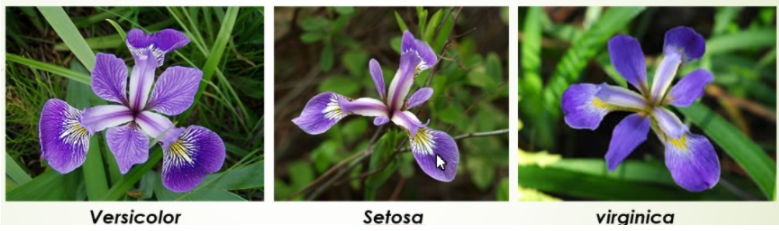

Download and save the dataset into the same folder as this program.

**Classification models** can be used to predict the target variable. Here we are going to use 5 different algorithms for classification namely, **K-Nearest Neighbours, Decision Tree, Support Vector Machine, Random Forest and Logistic Regression**. Atlast we compare their **accuracy and execution time** to find the suitable classification technique for this problem. The given dataset is seperated into two seperate train and test sets. The train set is used to train the model, and the test set is used to predict the accuracy of each model. Finally, we compare the results.

<br><h2 id="load">📌 IMPORTING LIBRARIES & LOADING DATASET</h2>

* Importing required libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import time
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from warnings import filterwarnings
filterwarnings('ignore')

* Loading the dataset

In [ ]:
iris_data = pd.read_csv("/content/iris.data", header=None)
iris_data.head() # Top 5 records

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris_data.tail() # bottom 5 records

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


* Adding headers to columns 

In [ ]:
data_header = ["Sepal_Length_cm", "Sepal_Width_cm","Petal_Length_cm", "Petal_Width_cm", "Species"]
iris_data.columns = data_header
iris_data.head()

,Sepal_Length_cm,Sepal_Width_cm,Petal_Length_cm,Petal_Width_cm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<br><h2 id="pre-processing">📌 EXPLORATORY DATA ANALYSIS</h2>

**Number of Rows and Columns in Iris Dataset**

In [ ]:
print(iris_data.shape)

(150, 5)


***Column Names**

In [ ]:
iris_data.columns

Index(['Sepal_Length_cm', 'Sepal_Width_cm', 'Petal_Length_cm',
       'Petal_Width_cm', 'Species'],
      dtype='object')

**Datatypes info**

In [ ]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sepal_Length_cm  150 non-null    float64
 1   Sepal_Width_cm   150 non-null    float64
 2   Petal_Length_cm  150 non-null    float64
 3   Petal_Width_cm   150 non-null    float64
 4   Species          150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


**Summary of dataset**

In [ ]:
iris_data.describe()

,Sepal_Length_cm,Sepal_Width_cm,Petal_Length_cm,Petal_Width_cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Checking for Null values**

In [ ]:
iris_data.isna().sum()

Sepal_Length_cm    0
Sepal_Width_cm     0
Petal_Length_cm    0
Petal_Width_cm     0
Species            0
dtype: int64

**Number of values in each Column**

In [ ]:
iris_data.count()

Sepal_Length_cm    150
Sepal_Width_cm     150
Petal_Length_cm    150
Petal_Width_cm     150
Species            150
dtype: int64

**Count different number of species**

In [ ]:
iris_data.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

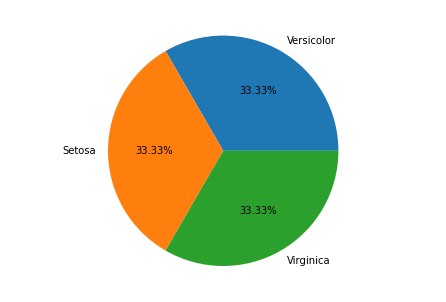

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
l = ['Versicolor', 'Setosa', 'Virginica']
s = [50,50,50]
ax.pie(s, labels = l,autopct='%1.2f%%')
plt.show()

**Checking for Outliers**

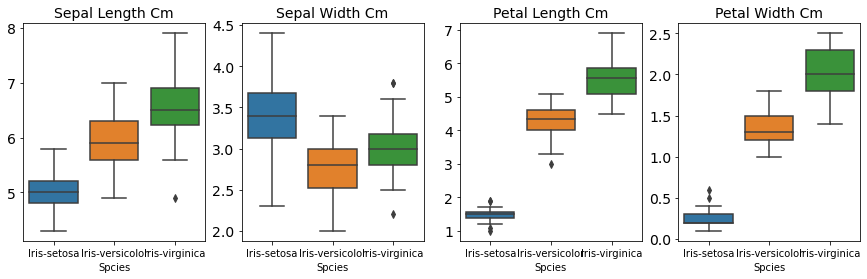

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=4)
for i in range(len(iris_data.columns[:-1])):
    column = iris_data.columns[i]
    sns.boxplot(x="Species", y=column, data=iris_data, ax=axes[i])
    axes[i].set_xlabel("Spcies")
    axes[i].set_ylabel("")
    axes[i].set_title(column.replace("_"," ").title(), fontsize=14)
    axes[i].tick_params(axis='y', labelsize=14)
fig.suptitle("")
fig.set_figwidth(15)
plt.show();

**Histogram**

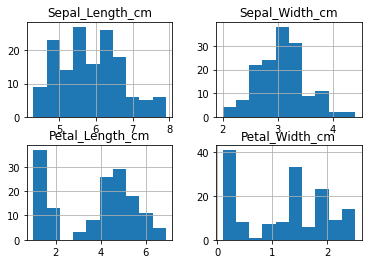

In [ ]:
iris_data.hist()
plt.show()

<br><h2 id="pre-processing">📌 PRE- PROCESSING</h2>

**Defining input and output variables**

In [ ]:
x = iris_data[['Sepal_Length_cm', 'Sepal_Width_cm', 'Petal_Length_cm', 'Petal_Width_cm']].values
x[0:4]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2]])

In [ ]:
y = iris_data['Species'].values
y[0:4]

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa'],
      dtype=object)

**Split the dataset into train and test sets**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.2, 
                                                    random_state = 1)

In [ ]:
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set :', x_test.shape,  y_test.shape)

Train set: (120, 4) (120,)
Test set : (30, 4) (30,)


**Normalize the dataset**

In [ ]:
x_train = preprocessing.StandardScaler().fit(x_train).transform(x_train.astype(float))
x_train[0:5]

array([[ 0.31553662, -0.03612186,  0.44748582,  0.2345312 ],
       [ 2.2449325 , -0.03612186,  1.29803965,  1.39642889],
       [-0.2873996 , -1.240184  ,  0.0505607 , -0.15276803],
       [ 0.67729835, -0.51774672,  1.01452171,  1.13822941],
       [-0.04622511, -0.51774672,  0.73100376,  1.52552864]])

In [ ]:
x_test = preprocessing.StandardScaler().fit(x_test).transform(x_test.astype(float))

<br><h2 id="models">📌 BUILDING MODELS</h2>

In [ ]:
def confusion_matrix_plot(pred):
    labels = ['Iris-virginica', 'Iris-setosa', 'Iris-versicolor']
    matrix = confusion_matrix(pred, y_test, labels=labels)

    fig, ax = plt.subplots(figsize=(8,6))
    ax = sns.heatmap(matrix, annot = True, xticklabels = labels, yticklabels = labels, cmap = "Greens")
    ax.set_title("Confusion Matrix", fontsize=18)
    ax.set_xlabel("Predicted", fontsize=14)
    ax.set_ylabel("Actual", fontsize=14)

**1. Logistic Regression**

Tuned Logistic Regression Parameters: {'C': 3.727593720314938}
Accuracy of Logistic Regression is  : 95.83
Computation time                    : 0.975 - Sec

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.62      0.76        13
 Iris-virginica       0.55      1.00      0.71         6

       accuracy                           0.83        30
      macro avg       0.85      0.87      0.82        30
   weighted avg       0.91      0.83      0.84        30



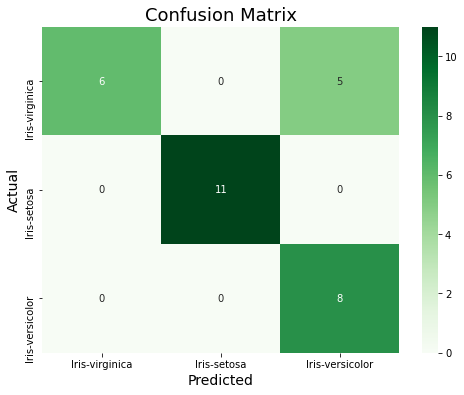

In [ ]:
from sklearn.linear_model import LogisticRegression

c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

start_lr = time.time()
lr = GridSearchCV(LogisticRegression(),param_grid,cv = 5)
lr.fit(x_train, y_train)
end_lr = time.time()
final_lr = end_lr - start_lr
final_lr = round(final_lr,3)

y_pred_lr = lr.predict(x_test)
accuracy_lr=lr.best_score_*100
accuracy_lr=round(accuracy_lr,2)

print("Tuned Logistic Regression Parameters: {}".format(lr.best_params_))
print("Accuracy of Logistic Regression is  :", round(accuracy_lr,2))
print("Computation time                    : {} - Sec".format(final_lr))
print("\nClassification Report:\n",classification_report(y_test, y_pred_lr))
confusion_matrix_plot(y_pred_lr)

    - 25 samples from the 30 test samples were predicted correctly,which is an accuracy of 95.83%.

**2. K Nearest Neighbours**

Accuracy of KNN is                  : 83.33
Computation time                    : 0.002 - Sec

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.62      0.76        13
 Iris-virginica       0.55      1.00      0.71         6

       accuracy                           0.83        30
      macro avg       0.85      0.87      0.82        30
   weighted avg       0.91      0.83      0.84        30



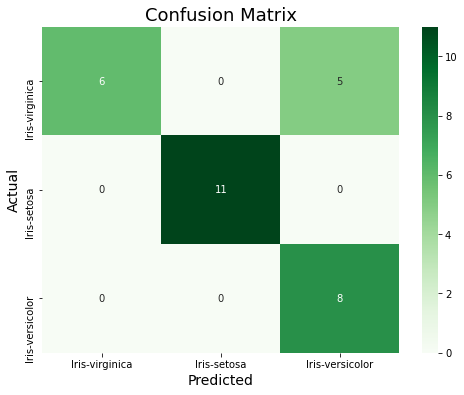

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

start_knn = time.time()
knn = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
knn.fit(x_train, y_train)
end_knn = time.time()
final_knn = end_knn - start_knn
final_knn = round(final_knn,3)

y_pred_knn = knn.predict(x_test)
accuracy_knn=accuracy_score(y_test,y_pred_knn)*100
accuracy_knn=round(accuracy_knn,2)

print("Accuracy of KNN is                  :", round(accuracy_knn,2))
print("Computation time                    : {} - Sec".format(final_knn))
print("\nClassification Report:\n",classification_report(y_test, y_pred_knn))
confusion_matrix_plot(y_pred_knn)

    - 25 samples from the 30 test samples were predicted correctly,which is an accuracy of 83.33%.

**3. Random Forest Classifier**

Accuracy of Random Forest is        : 90.0
Computation time                    : 0.275 - Sec

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.77      0.87        13
 Iris-virginica       0.67      1.00      0.80         6

       accuracy                           0.90        30
      macro avg       0.89      0.92      0.89        30
   weighted avg       0.93      0.90      0.90        30



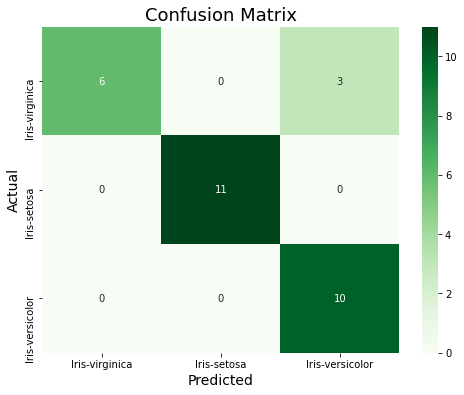

In [ ]:
from sklearn.ensemble import RandomForestClassifier

start_rf = time.time()
rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                            n_estimators=100, oob_score=True)
rf.fit(x_train, y_train)
end_rf = time.time()
final_rf = end_rf - start_rf
final_rf = round(final_rf,3)

y_pred_rf = rf.predict(x_test)
accuracy_rf=accuracy_score(y_test,y_pred_rf)*100
accuracy_rf=round(accuracy_rf,2)

print("Accuracy of Random Forest is        :", round(accuracy_rf,2))
print("Computation time                    : {} - Sec".format(final_rf))
print("\nClassification Report:\n",classification_report(y_test, y_pred_rf))
confusion_matrix_plot(y_pred_rf)

    - 27 samples from the 30 test samples were predicted correctly,which is an accuracy of 90%.

**4. Decision Tree**

Accuracy of Decision Tree is        : 90.0
Computation time                    : 0.008 - Sec

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.77      0.87        13
 Iris-virginica       0.67      1.00      0.80         6

       accuracy                           0.90        30
      macro avg       0.89      0.92      0.89        30
   weighted avg       0.93      0.90      0.90        30



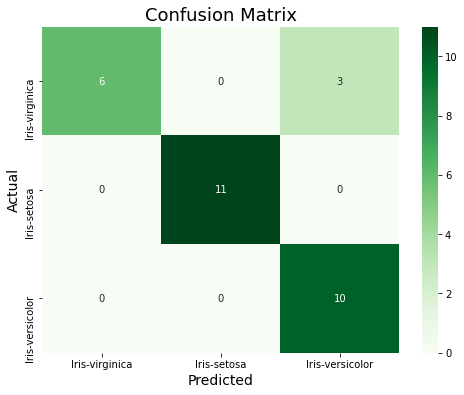

In [ ]:
from sklearn.tree import DecisionTreeClassifier

start_dt = time.time()
dt = DecisionTreeClassifier()
dt_model = dt.fit(x_train, y_train)
end_dt = time.time()
final_dt = end_dt - start_dt
final_dt = round(final_dt,3)

y_pred_dt = dt_model.predict(x_test)
accuracy_dt=accuracy_score(y_test, y_pred_dt)*100
accuracy_dt=round(accuracy_dt,2)

print("Accuracy of Decision Tree is        :", round(accuracy_dt,2))
print("Computation time                    : {} - Sec".format(final_dt))
print("\nClassification Report:\n",classification_report(y_test, y_pred_dt))
confusion_matrix_plot(y_pred_dt)

    - 27 samples from the 30 test samples were predicted correctly,which is an accuracy of 90%.

**5. Support Vector Machine**

Accuracy of Decision Tree is        : 83.33
Computation time                    : 0.015 - Sec

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.62      0.76        13
 Iris-virginica       0.55      1.00      0.71         6

       accuracy                           0.83        30
      macro avg       0.85      0.87      0.82        30
   weighted avg       0.91      0.83      0.84        30



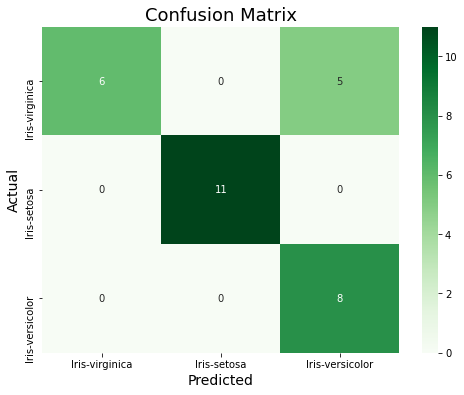

In [ ]:
from sklearn.svm import SVC

start_svc = time.time()
svc = SVC()
svc_model = svc.fit(x_train, y_train)
end_svc = time.time()
final_svc = end_svc - start_svc
final_svc = round(final_svc,3)

y_pred_svc = svc_model.predict(x_test)
accuracy_svc=accuracy_score(y_test, y_pred_svc)*100
accuracy_svc=round(accuracy_svc,2)

print("Accuracy of Decision Tree is        :", accuracy_svc)
print("Computation time                    : {} - Sec".format(final_svc))
print("\nClassification Report:\n",classification_report(y_test, y_pred_svc))
confusion_matrix_plot(y_pred_svc)

    - 25 samples from the 30 test samples were predicted correctly,which is an accuracy of 83.33%.

<h2 id="results">📌 RESULTS</h2>

In [ ]:
results = pd.DataFrame({
    'Algorithm': ['Logistic Regression','K Nearest Neighbours', 'Random Forest','Decision Tree','SVC'],
    'Accuracy Score': [accuracy_lr,accuracy_knn,accuracy_rf,accuracy_dt,accuracy_svc],
    'Execution Time in Secs': [final_lr,final_knn,final_rf,final_dt,final_svc]})
results.head(9)

,Algorithm,Accuracy Score,Execution Time in Secs
0,Logistic Regression,95.83,0.975
1,K Nearest Neighbours,83.33,0.002
2,Random Forest,90.00,0.275
3,Decision Tree,90.00,0.008
4,SVC,83.33,0.015


<br><h2 id="conclusion">📌 CONCLUSION</h2>

Purpose of this project was to compare different classification algorithms to predict the class of the iris flowers. Find and compare the accuracy of each model to find the best classifier.
<br>
Comparing the scores and accuarcy of each model, it is seen the **Logistic Regression** classification algorithm provides the highest accuracy for this problem using the Iris Data Set. And while,comparing the execution time taken by **KNearrest Neighbours** is less. Hence, Logistic Regression is the best classifier for iris dataset.

---

#<center>THANK YOU</center>

---